In [1]:
# import
import numpy as np

import sklearn.datasets

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.model_selection import train_test_split
digits = sklearn.datasets.load_digits()                                            #digits 불러오기
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)                #Data Frame

X = digits.data # x_data
y = digits.target # y_data

In [2]:
# function
def show_DF(): return digits_df # 데이터 프레임을 보여줌

def set_train(state, size): # 학습시킬 train 데이터를 뽑아냄(random seed, test_size를 인풋으로 넣을 수 있음, class 비율 적정하게 만듦)
  global x_train
  global y_train
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=state, stratify=y)

def train(): # x_train의 pinv를 구하고, w(예측)를 구한 뒤, y(예측)까지 구함
  global w_hat
  global y_hat
  n, d = len(x_train), 64
  w_hat = np.zeros((n,))
  A = np.array(x_train)
  Apinv = np.linalg.pinv(A)
  w_hat = np.dot(Apinv, y_train)
  y_hat = np.dot(A, w_hat)

def get_round_hat(): # y_hat의 반올림값
  global y_round_hat
  y_round_hat = []
  for i in range(len(y_hat)):
    y_round_hat.append(round(y_hat[i]))

def accuracy(): # O.K when -1 <= ERROR <= 1
  res = 0
  for i in range(len(y_hat)):
    if -1 <= y_train[i]-y_round_hat[i] <= 1: res += 1
  return res / len(y_hat)

def more_accuracy():
  res = 0
  for i in range(len(y_hat)):
    if y_train[i] == y_round_hat[i] : res += 1
  return res / len(y_hat)

def show_scatter_of_y_hat(): # y_train과 y_hat에 대한 산점도
  plt.scatter(y_train, y_hat)
  plt.show()

def show_scatter_of_y_round_hat(): # y_train과 y_round_hat에 대한 산점도
  plt.scatter(y_train, y_round_hat)
  plt.show()

In [7]:
# USE FUNCTION
set_train(883, 0.2)
train()
get_round_hat()

0.6325678496868476


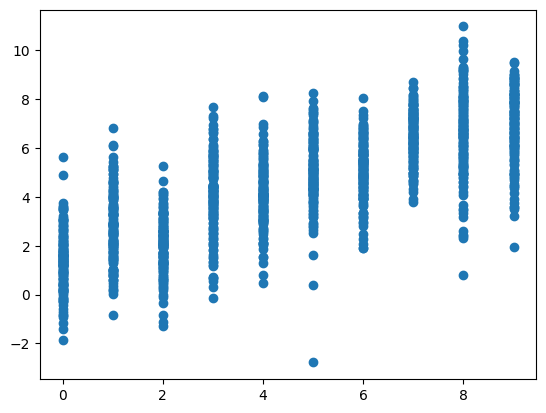

In [8]:
# RESULT
print(accuracy())
show_scatter_of_y_hat()

In [ ]:
# MORE FURTHER!
max = 0
who = 0
for i in range(1000): # examination for...
  set_train(i, 0.95)
  train()
  get_round_hat()
  acc = accuracy()
  if acc > max:
    max = acc
    who = i

In [9]:
print("acc =", max, "when state =", who)
print(more_accuracy())
show_scatter_of_y_hat()

NameError: ignored

In [25]:
def Whatisit(n):
  imgData = digits.data[n]
  y = np.dot(imgData.T, w_hat)
  result = round(y)
  return result

print(Whatisit(1))

1
